In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import norm, spearmanr,pearsonr,normaltest
from scipy.stats import shapiro

In [4]:
# Load MATLAB data
data = scipy.io.loadmat('../Data_example6.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Jankovic', 'NCA'])

In [5]:
Jankovic = data['Jankovic']
NCA = data['NCA']

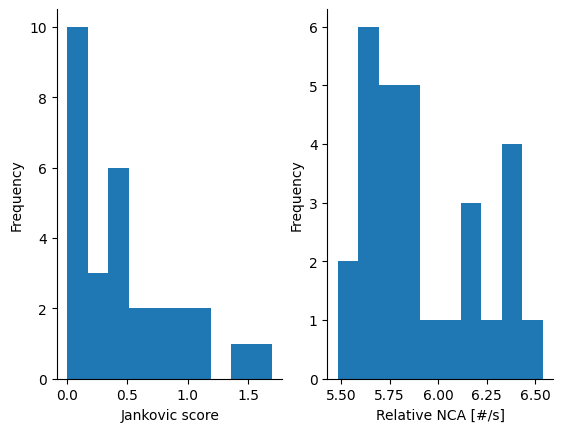

In [14]:
# Visualizzazione preliminare dei dati

fig, axs = plt.subplots(1, 2)
# Plot histograms
axs[0].hist(Jankovic)
axs[0].set_xlabel('Jankovic score')
axs[0].set_ylabel('Frequency')
axs[1].set_xlabel('Relative NCA [#/s]')
axs[1].set_ylabel('Frequency')
axs[1].hist(NCA)
# Turn off the top and right spines for both subplots
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [12]:
# Test di normalità
_, p1 = shapiro(Jankovic)
_, p2 = shapiro(NCA)
p1, p2

(np.float64(0.0021949176302826644), np.float64(0.02127357836256313))

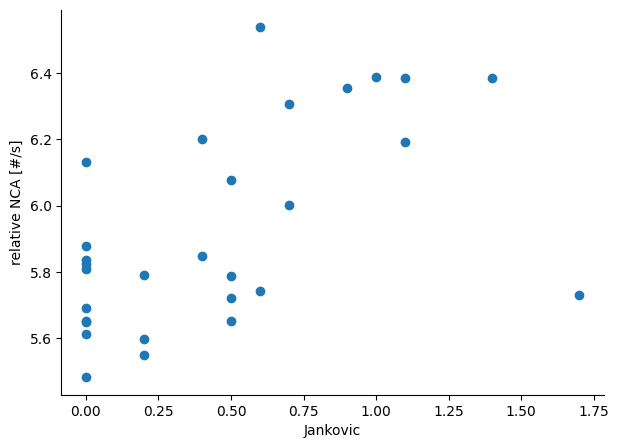

In [ ]:
# Rappresentazione dei dati: scatter plot
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(Jankovic, NCA)
ax.set_xlabel('Jankovic')
ax.set_ylabel('relative NCA [#/s]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
# Correlazione
rho, pval = spearmanr(Jankovic, NCA)
rho, pval

(np.float64(0.5590499648724959), np.float64(0.0016186619292549603))

In [17]:
# Trovare i coefficienti della retta di regressione tra MMSE e TMTa
N = 1  # retta
p = np.polyfit(Jankovic.flatten(), NCA.flatten(), N)
# Predire i valori di TMTa, tramite p
NCA_stimato = np.polyval(p, Jankovic)

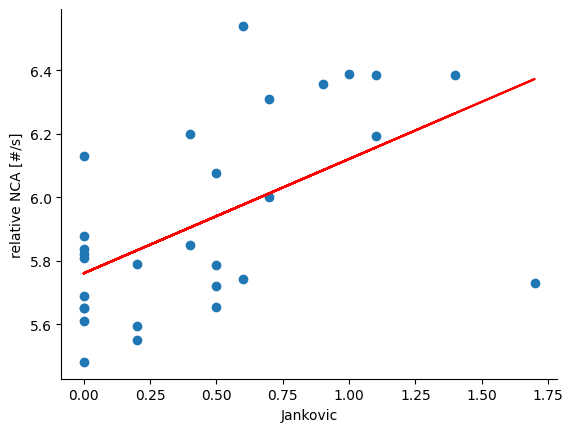

In [18]:
# Rappresentare la retta di regressione
fig, ax = plt.subplots()
ax.scatter(Jankovic, NCA)
ax.plot(Jankovic, NCA_stimato, 'r')
ax.set_xlabel('Jankovic')
ax.set_ylabel('relative NCA [#/s]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [19]:
# Calcolare il coefficiente di determinazione
#measure of how well the regression model explains the variance in the data
Rsq2 = np.sum((NCA_stimato - np.mean(NCA))**2) / np.sum((NCA - np.mean(NCA))**2)
Rsq2

np.float64(0.3112635942130887)